<a href="https://colab.research.google.com/github/PrarthanaL/PRODIGY_DS_04/blob/main/Internship_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRODIGY** **INFOTECH** **-** **DATA** **SCIENCE** **INTERNSHIP**

**Task** **04**

**Analyze** **and** **visualize** **sentiment** **patterns** **in** **social** **media** **data** **to** **understand** **public** **opinion** **and** **attitudes** **towards** **specific** **topics** **or** **brands.**

**Importing** **the** **packages**

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import spacy

In [2]:
import warnings
warnings.filterwarnings("ignore")

**Loading** **the** **dataset**

In [3]:
df = pd.read_csv('/content/twitter_training.csv')

In [4]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
df.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


**Data** **Preprocessing**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
df.shape

(74681, 4)

In [8]:
df.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [9]:
df.isnull()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
74676,False,False,False,False
74677,False,False,False,False
74678,False,False,False,False
74679,False,False,False,False


In [10]:
df.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [11]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
74676    False
74677    False
74678    False
74679    False
74680    False
Length: 74681, dtype: bool

In [12]:
df.duplicated().sum()

2700

In [13]:
df[df.duplicated()]

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
19,2404,Borderlands,Positive,that was the first borderlands session in a lo...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
50,2409,Borderlands,Neutral,Blaming Sight for Tardiness! A little bit of b...
63,2411,Borderlands,Neutral,.. [
145,2425,Borderlands,Negative,"""What a bitch!"""
...,...,...,...,...
74504,9171,Nvidia,Neutral,This benchmarking comparison between Oculus Qu...
74509,9172,Nvidia,Positive,@ NVIDIAGeForce @ nvidia
74588,9185,Nvidia,Neutral,Heard people are having issues with ordering t...
74618,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...


**Exploratory** **Data** **Analysis**

In [15]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [16]:
df.dtypes

2401                                                      int64
Borderlands                                              object
Positive                                                 object
im getting on borderlands and i will murder you all ,    object
dtype: object

In [21]:
df.describe(include="object")

,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
count,74681,74681,73995
unique,32,4,69490
top,TomClancysRainbowSix,Negative,
freq,2400,22542,172


In [17]:
df.describe(include="all")

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [22]:
df['Positive'].value_counts()

Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: Positive, dtype: int64

In [23]:
df.dropna(inplace=True)

**Exploratory** **Data** **Analysis** **Using** **Visualizations**  

<Axes: xlabel='Positive', ylabel='count'>

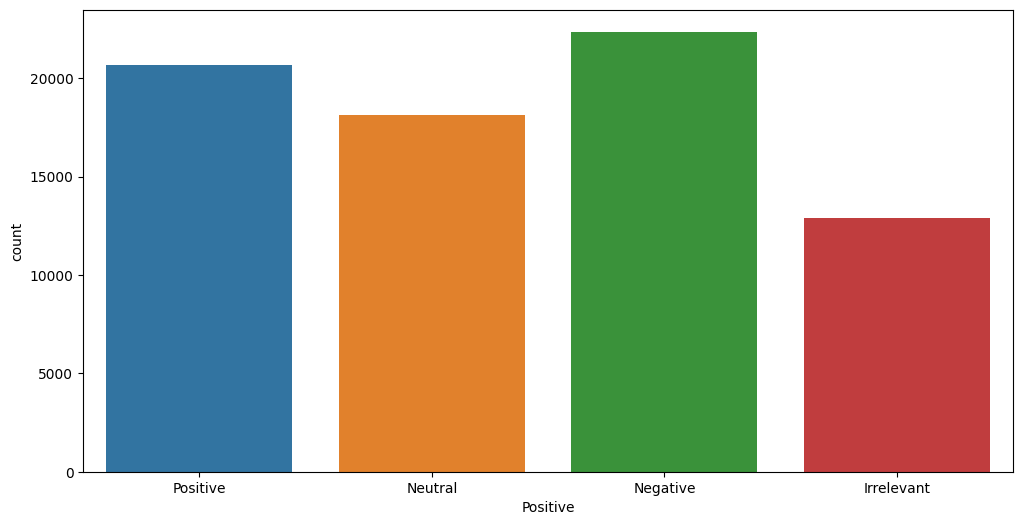

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='Positive',data=df)

<Axes: xlabel='2401', ylabel='count'>

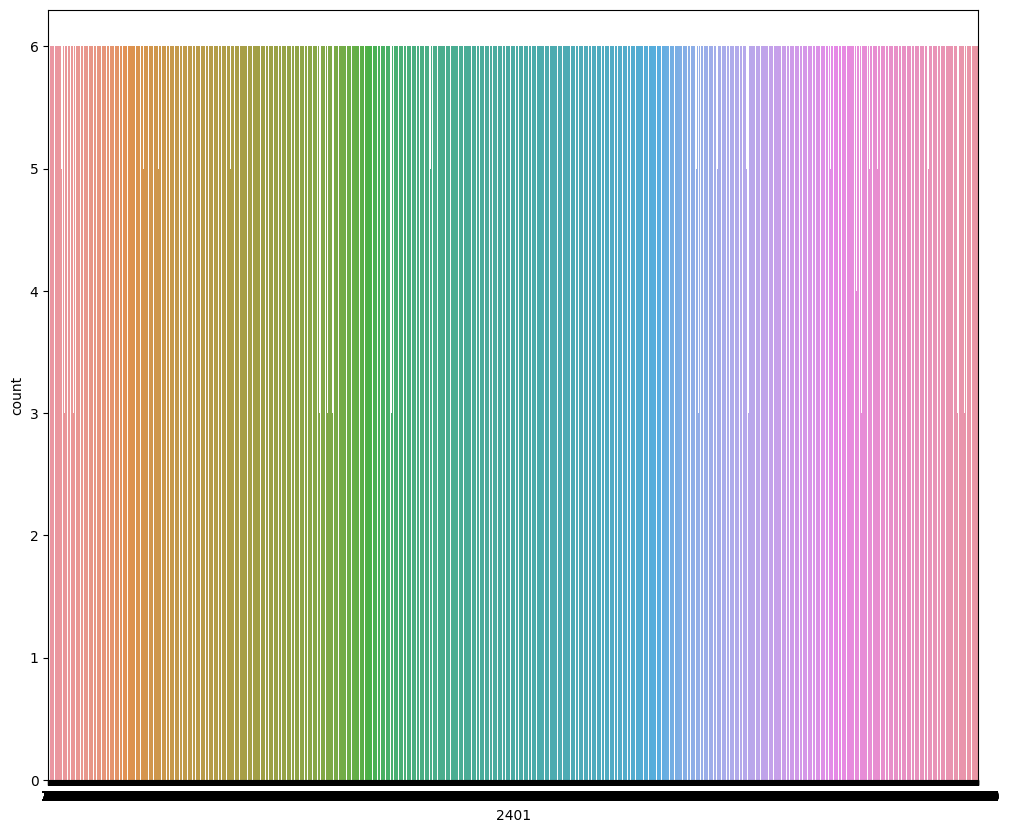

In [41]:
plt.figure(figsize=(12,10))
sns.countplot(x='2401',data=df)

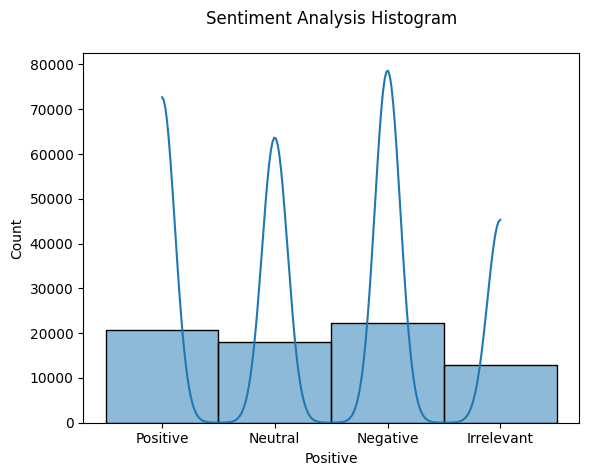

In [30]:
sns.histplot(x="Positive", data=df, kde=True)
plt.title("Sentiment Analysis Histogram\n")
plt.show()

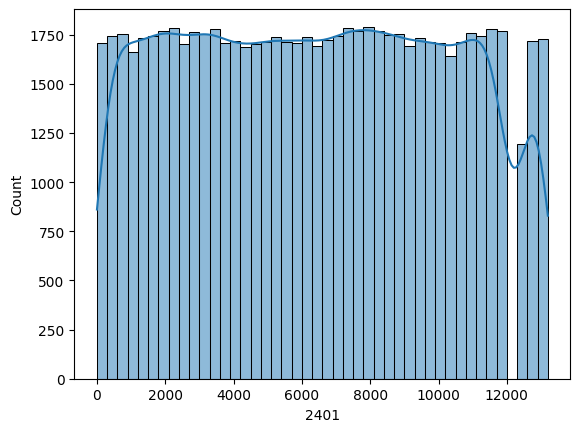

In [42]:
sns.histplot(x="2401", data=df, kde=True)
plt.show()

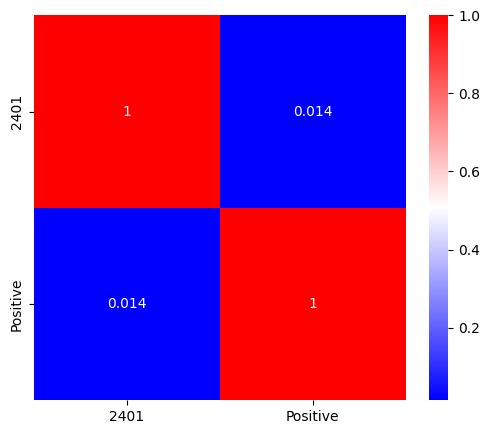

In [65]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), cmap='bwr', annot=True)
plt.show()

**Encoding** **Target** **Column**  

In [43]:
le_model = LabelEncoder()
df['Positive'] = le_model.fit_transform(df['Positive'])

In [72]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,3,I am coming to the borders and I will kill you...
1,2401,Borderlands,3,im getting on borderlands and i will kill you ...
2,2401,Borderlands,3,im coming on borderlands and i will murder you...
3,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,3,im getting into borderlands and i can murder y...


In [53]:
X_train, X_test, y_train, y_test = train_test_split(df['Borderlands'], df['Positive'],
                                                    test_size=0.2, random_state=42, stratify=df['Positive'])

In [54]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (59196,)
Shape of X_test:  (14799,)


**Machine** **Learning** **Model**  

In [66]:
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('naive_bayes', (RandomForestClassifier()))
])

In [67]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('naive_bayes', RandomForestClassifier())])

In [68]:
y_pred = clf.predict(X_test)

In [69]:
print(accuracy_score(y_test, y_pred))

0.4203662409622272


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.28      0.32      2575
           1       0.47      0.44      0.46      4472
           2       0.39      0.46      0.42      3621
           3       0.41      0.45      0.43      4131

    accuracy                           0.42     14799
   macro avg       0.41      0.41      0.41     14799
weighted avg       0.42      0.42      0.42     14799

